In [1]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

In [2]:
# nltk count words
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\felix\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\felix\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# dataset reddit jokes

In [3]:
# Load the data from the JSON file
data_path = './data/reddit_jokes.json'
with open(data_path) as f:
    data = json.load(f)

In [12]:
# create pandas dataframe of the data
df = pd.DataFrame(data)
df.head()

body      id  score  \
0  Now I have to say "Leroy can you please paint ...  5tz52q      1   
1  Pizza doesn't scream when you put it in the ov...  5tz4dd      0   
2  ...and being there really helped me learn abou...  5tz319      0   
3  A Sunday school teacher is concerned that his ...  5tz2wj      1   
4  He got caught trying to sell the two books to ...  5tz1pc      0   

                                               title  
0   I hate how you cant even say black paint anymore  
1  What's the difference between a Jew in Nazi Ge...  
2                     I recently went to America....  
3  Brian raises his hand and says, “He’s in Heaven.”  
4  You hear about the University book store worke...

In [5]:
# get jokes with highest scores min 4.5
good_jokes = df[df['score'] >= 4.5].values
# random sample of 5 jokes
print(np.array(good_jokes).shape)
# 5 random indices min max
number_of_jokes = 5
idx = np.random.randint(0, len(good_jokes), number_of_jokes)
for i in idx:
    print(good_jokes[i][0])
    print(good_jokes[i][1])
    print(good_jokes[i][2])
    print('-----------')

(82914, 4)
Now it doesn't work

I painted it white and now the system is corrupt.

Painted it yellow and all the drivers crashed

Painted a vagina on it and now all it does is whine.
4i6fy5
82
-----------
A blonde walks into a bank in New York City and asks for the loan officer. She says she's going to Europe on business for two weeks and needs to borrow $5,000. The bank officer says the bank will need some kind of security for the loan, so the blonde hands over the keys to a new Rolls Royce. The car is parked on the street in front of the bank; she has the title, and everything checks out. The bank agrees to accept the car as collateral for the loan. The bank's president and its officers all enjoy a good laugh at the blonde for using a $250,000 Rolls as collateral against a $5,000 loan. An employee of the bank then drives the Rolls into the bank's underground garage and parks it there. Two weeks later, the blonde returns and repays the $5,000 and the interest, which comes to $15.41. T

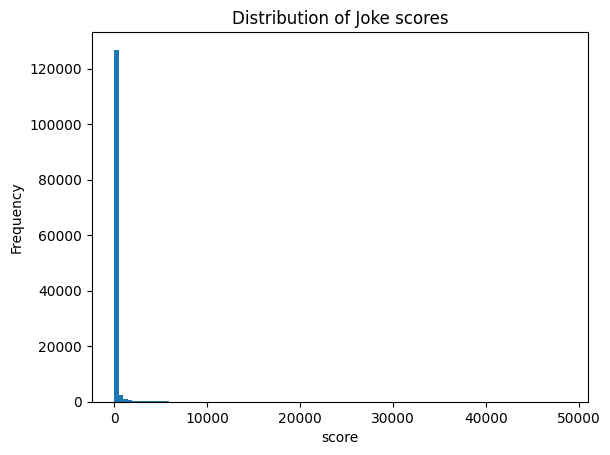

In [ ]:
# plot the distribution of scores
scores = df[df['score'] > 0]['score']
plt.hist(scores, bins=100)
plt.xlabel('score')
plt.ylabel('Frequency')
plt.title('Distribution of Joke scores with score > 0')
plt.show()

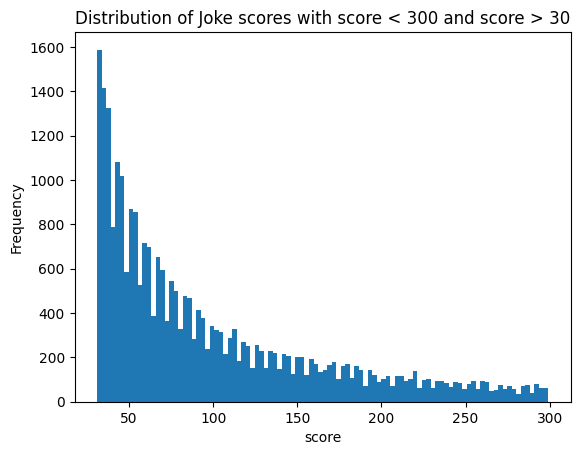

In [40]:
# plot the distribution of scores but cut of the tail score above 100 and below 0
min_score = 30
max_score = 300

scores = df[(df['score'] < max_score) & (df['score'] > min_score)]['score']
plt.hist(scores, bins=100)
plt.xlabel('score')
plt.ylabel('Frequency')
plt.title(f'Distribution of Joke scores with score < {max_score} and score > {min_score}')
plt.show()

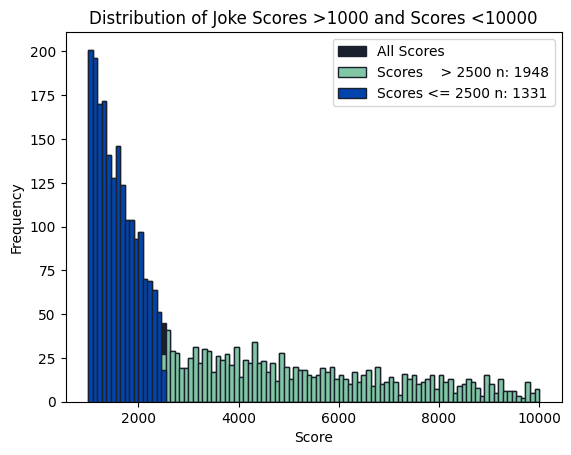

Number of jokes with score > 1000 and <10000 : 3279


In [44]:
min_score = 1000  # 1000
max_score = 10_000  # 10_000
cut_off = 2500


# Filter scores within the specified range
scores = df[(df['score'] > min_score) & (df['score'] < max_score)]['score']

# Create bins
bins = np.linspace(min_score, max_score, 100)

# Plot the histogram
plt.hist(scores, bins=bins, color='#1b212c', edgecolor='#1b212c')

green_scores = scores[scores > cut_off]
red_scores = scores[scores <= cut_off]

# Highlight scores above and below 2500
plt.hist(green_scores, bins=bins, color='#82c7a5', edgecolor='#1b212c')
plt.hist(red_scores, bins=bins, color='#0145ac', edgecolor='#1b212c')

plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title(f'Distribution of Joke Scores >{min_score} and Scores <{max_score}')
plt.legend(['All Scores', f'Scores    > {cut_off} n: {len(red_scores)}', f'Scores <= {cut_off} n: {len(green_scores)}'])
plt.show()

# Print number of jokes with score > 1000 and < 10000
num_jokes = len(scores)
print(f'Number of jokes with score > {min_score} and <{max_score} :', num_jokes)